In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

SETTING_PATH

In [ ]:
# train_path = "F:\Project\OGDATASET\Train"  
# test_path = "F:\Project\OGDATASET"

In [25]:
train_path = "F:\Project\Dataset_enhanced\Train"  
test_path = "F:\Project\Dataset_enhanced"

In [26]:
classes = sorted(os.listdir(train_path),key=int)
num_classes = len(classes)  

In [27]:
X, y = [], []
for label, class_name in enumerate(classes):
    class_folder = os.path.join(train_path, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = load_img(img_path, target_size=(32, 32))  
        img = img_to_array(img) / 255.0 
        X.append(img)
        y.append(label)

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
y = to_categorical(y, num_classes=num_classes)

SPLIT_VAL_TEST

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

CNN_MODEL

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(24, (5, 5), strides=1, activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(36, (5, 5), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(48, (5, 5), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(64, (5, 5), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(64, (5, 5), strides=1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

TRAINING

In [33]:

history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_data=(X_val, y_val)
)


model.save("enhanced_noMD_sign_classifier.h5")
print("Model saved successfully!")

Epoch 1/30
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 154s 56ms/step - accuracy: 0.0217 - loss: 3.7616 - val_accuracy: 0.0224 - val_loss: 3.7616
Epoch 2/30
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 151s 56ms/step - accuracy: 0.0240 - loss: 3.7615 - val_accuracy: 0.0222 - val_loss: 3.7618
Epoch 3/30
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 143s 53ms/step - accuracy: 0.0233 - loss: 3.7615 - val_accuracy: 0.0222 - val_loss: 3.7616
Epoch 4/30
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 140s 52ms/step - accuracy: 0.0243 - loss: 3.7614 - val_accuracy: 0.0233 - val_loss: 3.7615
Epoch 5/30
1164/2688 ━━━━━━━━━━━━━━━━━━━━ 1:14 49ms/step - accuracy: 0.0224 - loss: 3.7612

KeyboardInterrupt: 

GRAPH_PLOT

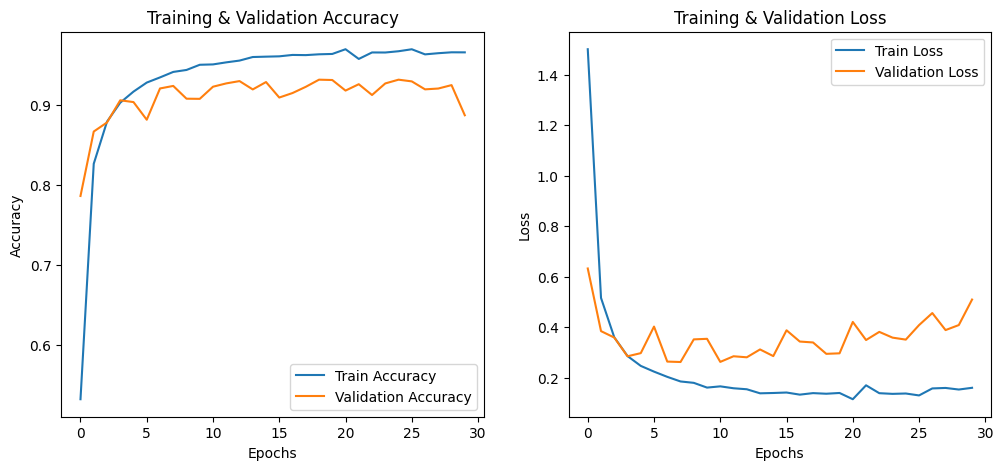

In [ ]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()


TEST_MODEL

In [ ]:

model = tf.keras.models.load_model("enhanced_sign_classifier.h5")


In [ ]:
csv_file = r"F:\Project\Dataset_enhanced\Test.csv" 

In [ ]:
df = pd.read_csv(csv_file)  


In [ ]:
def predict_sign(image_path):
    img = load_img(image_path, target_size=(32, 32), color_mode="rgb")

  
    
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)  

    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    print(image_path,"   ","class is ",predicted_class)

    return predicted_class  

TESTING_SEPARATE

In [ ]:
###############################################################################

In [ ]:
# import cv2

In [ ]:
# path = 'testOutC.png'

In [ ]:
# path = r'F:\Project\Dataset\Train\2\00002_00002_00027.png'

In [ ]:
# predict_sign(path)

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
F:\Project\Dataset\Train\2\00002_00002_00027.png     class is  2


np.int64(2)

In [ ]:
#################################################################################

In [ ]:
y_true = []  
y_pred = []  

In [ ]:
for index, row in df.iterrows():
    img_name = row["Path"]  
    true_label = row["ClassId"]  

    img_path = os.path.join(test_path, img_name)  

    
    if os.path.exists(img_path):  
        predicted_label = predict_sign(img_path)
        y_true.append(true_label)
        y_pred.append(predicted_label)
    else:
        print(f"Warning: Image {img_name} not found!")

(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
F:\Project\OGDATASET\Test/00000.png     class is  16
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
F:\Project\OGDATASET\Test/00001.png     class is  1
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
F:\Project\OGDATASET\Test/00002.png     class is  38
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
F:\Project\OGDATASET\Test/00003.png     class is  33
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
F:\Project\OGDATASET\Test/00004.png     class is  11
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
F:\Project\OGDATASET\Test/00005.png     class is  38
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
F:\Project\OGDATASET\Test/00006.png     class is  18
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
F:\Project\OGDATASET\Test/00007.png     class is  12
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
F:\Project\OGDATASET\Test/00008.png     class is  25
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms

PERFOMANCE_MATRIX

In [ ]:
cm = confusion_matrix(y_true, y_pred)

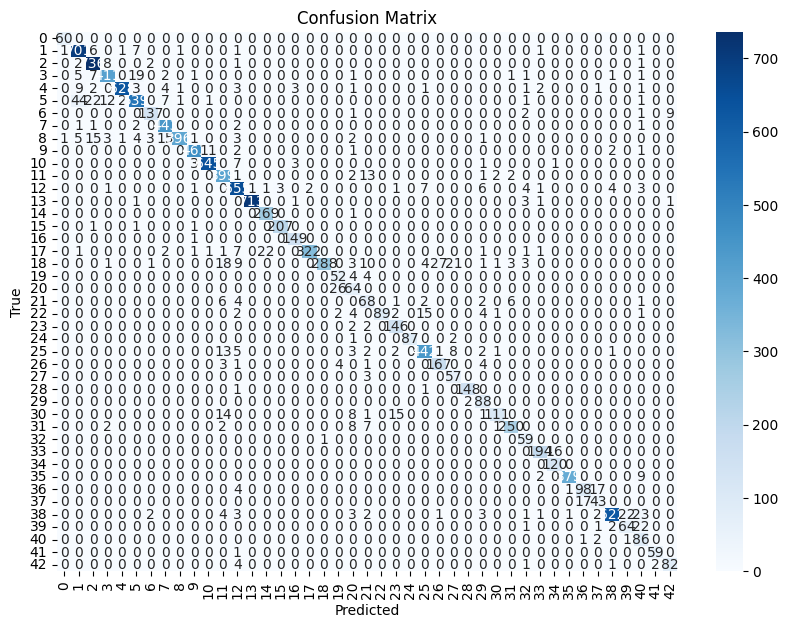

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

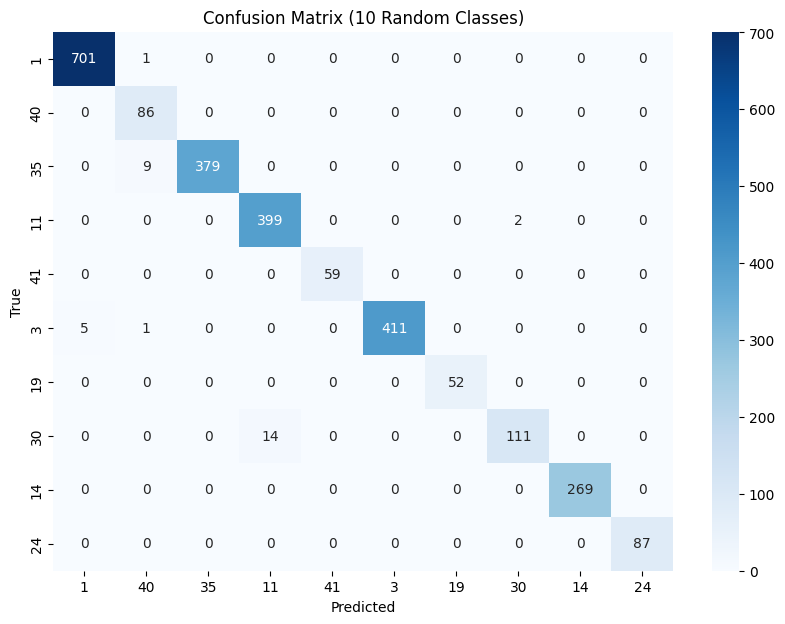

In [ ]:

selected_classes = np.random.choice(range(43), 10, replace=False)


cm_reduced = cm[np.ix_(selected_classes, selected_classes)]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (10 Random Classes)')
plt.show()

In [ ]:
report = classification_report(y_true, y_pred, target_names=classes, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.9677    1.0000    0.9836        60
           1     0.9128    0.9736    0.9422       720
           2     0.9316    0.9813    0.9558       750
           3     0.9384    0.9133    0.9257       450
           4     0.9937    0.9515    0.9721       660
           5     0.9358    0.8556    0.8939       630
           6     0.9448    0.9133    0.9288       150
           7     0.9366    0.9844    0.9599       450
           8     0.9925    0.8800    0.9329       450
           9     0.9809    0.9646    0.9727       480
          10     0.9802    0.9773    0.9788       660
          11     0.8674    0.9500    0.9068       420
          12     0.9148    0.9493    0.9317       690
          13     0.9986    0.9903    0.9944       720
          14     0.9212    0.9963    0.9573       270
          15     0.9857    0.9857    0.9857       210
          16     0.9551    0.9933    0.9739       150
   

In [ ]:
accuracy = (np.array(y_true) == np.array(y_pred)).mean() * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 92.92%
